# Movie clustering

## imports

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ls

Untitled.ipynb  movie.csv


## upload data

In [5]:
m = pd.read_csv("movie.csv")
m.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## data cleaning

### split the genre's by the pipe, "|"

In [9]:
m['genres_2'] = m['genres'].str.split("|")

In [11]:
m.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'genres_2'],
      dtype='object')

In [10]:
m.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_2
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,"[Action, Adventure, Fantasy, Sci-Fi]"
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,"[Action, Adventure, Fantasy]"
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,"[Action, Adventure, Thriller]"
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,"[Action, Thriller]"
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,[Documentary]


### split the terms's (plot keywords) by the pipe, "|"

In [15]:
m['terms'] = m['plot_keywords'].str.split("|")

### the apply(pd.series) will convert the lists of terms into pandas series data types. Then stack will will make new rows.

In [19]:
m2 = m.set_index(['movie_title'])['terms'].apply(pd.Series).stack().reset_index()
m2.columns = ['movie_title','level_1','terms']
m2.head(7)

,movie_title,level_1,terms
0,Avatar,0,avatar
1,Avatar,1,future
2,Avatar,2,marine
3,Avatar,3,native
4,Avatar,4,paraplegic
5,Pirates of the Caribbean: At World's End,0,goddess
6,Pirates of the Caribbean: At World's End,1,marriage ceremony


## Some basic statistics

In [25]:
len(set(m2['terms']))

8082

In [125]:
len(set(m2['movie_title']))

3051

## define top terms 

In [102]:
top_terms = list(m2['terms'].value_counts()[0:100].index)

In [103]:
m2 = m2[m2['terms'].isin(top_terms)]

## count the occurences of each term for each movie.

In [105]:
features = pd.crosstab(index=m2['movie_title'],columns=m2['terms'])
features.head()

terms,actor,african american,alien,assassin,baby,bank,bar,based on novel,based on true story,battle,...,teenager,terrorist,texas,title directed by female,train,vampire,violence,vomiting,wedding,writer
movie_title,,,,,,,,,,,,,,,,,,,,,
#Horror,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Cloverfield Lane,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102 Dalmatians,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10th & Wolf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## total terms is the sum of all terms for each movie. So, in general, it is 5 for each row.

## Then we devide each element of each row by the "total terms"

In [106]:
total_terms = features.sum(axis=1)
tf = features.div(total_terms, axis=0)

In [107]:
df = pd.DataFrame(features.sum())

In [109]:
df['total_movies'] = len(set(m2['movie_title']))

In [110]:
df['idf'] = np.log(df['total_movies']/df[0])

In [111]:
idf = df['idf']

In [112]:
idf.head(12)

terms
actor                  4.467877
african american       4.655929
alien                  3.641198
assassin               4.439706
baby                   4.557489
bank                   4.655929
bar                    4.526717
based on novel         4.655929
based on true story    4.691020
battle                 4.194583
best friend            4.194583
birthday               4.691020
Name: idf, dtype: float64

In [113]:
tf.tail(12)

terms,actor,african american,alien,assassin,baby,bank,bar,based on novel,based on true story,battle,...,teenager,terrorist,texas,title directed by female,train,vampire,violence,vomiting,wedding,writer
movie_title,,,,,,,,,,,,,,,,,,,,,
ZMD: Zombies of Mass Destruction,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zack and Miri Make a Porno,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zambezia,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero Dark Thirty,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zipper,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zodiac,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombie Hunter,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoom,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zulu,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
tf_idf = tf.multiply(idf)

In [115]:
tf_idf

terms,actor,african american,alien,assassin,baby,bank,bar,based on novel,based on true story,battle,...,teenager,terrorist,texas,title directed by female,train,vampire,violence,vomiting,wedding,writer
movie_title,,,,,,,,,,,,,,,,,,,,,
#Horror,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
10 Cloverfield Lane,0.000000,0.0,3.641198,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
10 Things I Hate About You,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
102 Dalmatians,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
10th & Wolf,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
11:14,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
12 Angry Men,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
12 Rounds,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,2.167173,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
13 Hours,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,4.69102,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [116]:

matrix_rows_normed = tf_idf.div(np.sqrt(np.square(tf_idf).sum(axis=1)),axis=0)

In [117]:
dot = matrix_rows_normed.dot(matrix_rows_normed.T)
distance = 1-dot

(0, 40)

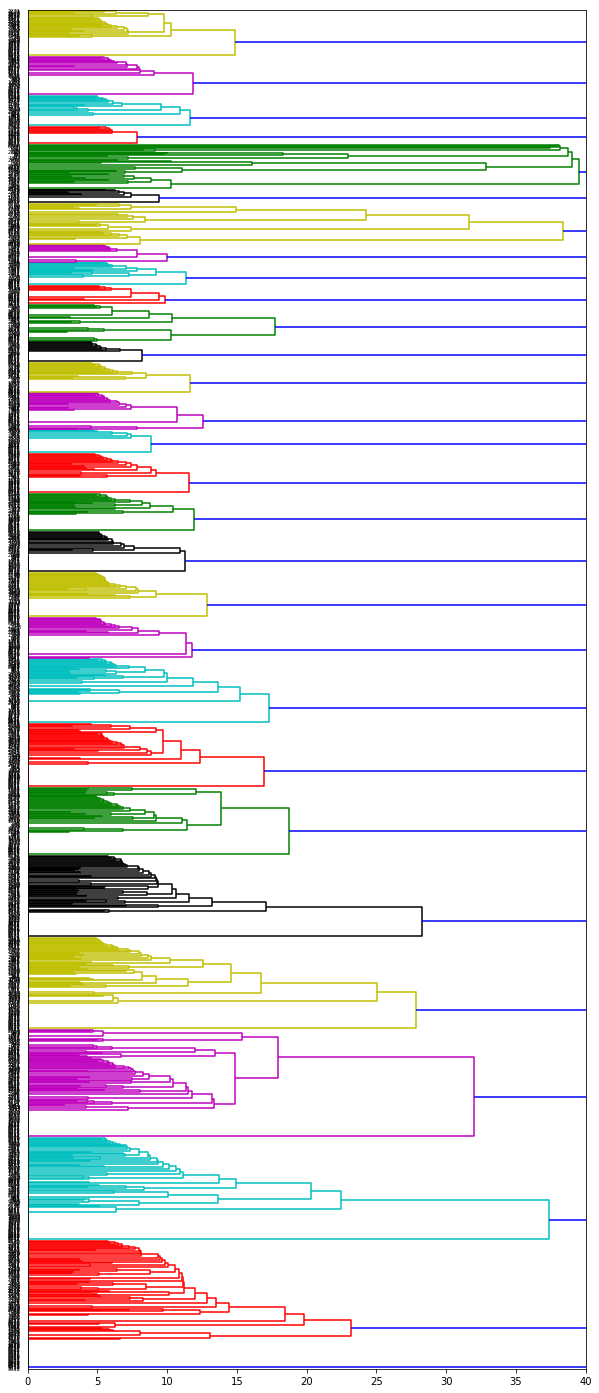

In [123]:
import scipy.cluster.hierarchy as sch
linkage_matrix = sch.linkage(distance, method='ward')
plt.figure(figsize=(10,25))





dendrogram = sch.dendrogram(linkage_matrix,color_threshold=40,
                            get_leaves=True,
                            orientation='right',
                            truncate_mode='level',
                           #show_contracted=True
                           )
plt.xlim((0,40))

#plt.xticks(ticks=[])

In [124]:
dendrogram

{'icoord': [[285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [255.0, 255.0, 273.75, 273.75],
  [245.0, 245.0, 264.375, 264.375],
  [235.0, 235.0, 254.6875, 254.6875],
  [225.0, 225.0, 244.84375, 244.84375],
  [215.0, 215.0, 234.921875, 234.921875],
  [205.0, 205.0, 224.9609375, 224.9609375],
  [195.0, 195.0, 214.98046875, 214.98046875],
  [185.0, 185.0, 204.990234375, 204.990234375],
  [175.0, 175.0, 194.9951171875, 194.9951171875],
  [165.0, 165.0, 184.99755859375, 184.99755859375],
  [155.0, 155.0, 174.998779296875, 174.998779296875],
  [145.0, 145.0, 164.9993896484375, 164.9993896484375],
  [135.0, 135.0, 154.99969482421875, 154.99969482421875],
  [125.0, 125.0, 144.99984741210938, 144.99984741210938],
  [115.0, 115.0, 134.9999237060547, 134.9999237060547],
  [105.0, 105.0, 124.99996185302734, 124.99996185302734],
  [95.0, 95.0, 114.99998092651367, 114.99998092651367],
  [85.0, 85.0, 104.99999046325684, 104.99999046325684],
  [75.0, 75.